In [8]:
from qsharp_bridge import *
from qsharp_widgets import Circuit
import matplotlib.pyplot as plt
import os
import json
import requests
import qsharp

from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [10]:
def visualize(data):
    pairs = ['[{}, {}]'.format(*pair) for pair in data['result']['c']]
    counts = {pair: pairs.count(pair) for pair in set(pairs)}

    plt.figure(figsize=(4, 3))
    plt.bar(counts.keys(), counts.values())
    plt.show()

In [ ]:
code = """

"""

qsharp.eval(code)

In [16]:
Circuit(qsharp.circuit("Main()"))

QSharpError: Error: cannot compare measurement results
Call stack:
    at RunBell in line_6
    at Main in line_6
Qsc.Eval.ResultComparisonUnsupported

  x runtime error
  `-> cannot compare measurement results
    ,-[line_6:30:23]
 29 | 
 30 |             if (r1 == Zero and r2 == Zero) { set res w/= 0 <- res[0]+1; }
    :                       ^^|^
    :                         `-- cannot compare to result
 31 |             if (r1 == Zero and r2 == One) { set res w/= 1 <- res[1]+1; }
    `----
  help: comparing measurement results is not supported when performing
        circuit synthesis or base profile QIR generation


In [5]:
qasm_code = qasm2(code)
print(qasm_code)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0], q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



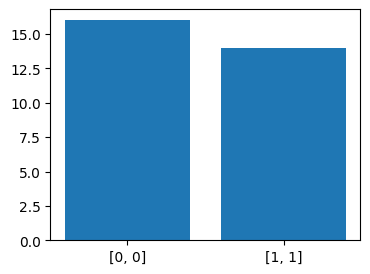

In [ ]:
req = {
    'script': qasm_code,
    'count': 30
}

result = requests.post('<path to QASM simulator>', json=req, verify=False)
data = json.loads(result.content)
visualize(data)